In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def calc_cost2parent(node_idx):
    if node_idx == 11:
        return 0
    return (x_list[node_idx] - x_list[oya_list_[node_idx]])**2 + (y_list[node_idx] - y_list[oya_list_[node_idx]])**2

#ノードのx座標リスト．例えば0番のノードのx座標はx_list[0]となる．
x_list=[115,63,40,75,75,103,165,149,79,71,84,117,97,51,75,128,23,46,104,59,
        83,49,184,126,128,49,146,126,36]

#ノードのy座標リスト．例えば0番のノードのy座標はy_list[0]となる．
y_list=[176,166,189,110,203,207,65,163,226,131,55,230,134,90,90,120,59,126,
        95,139,177,50,124,150,79,213,142,191,158]

#各ノードの送信先ノード番号のリスト．木構造で言うところの親ノードの番号．
#初期値は全ノードは木構造のルートである11番のノードに接続されている．
#ルートである11番の親は存在しないので-1を格納．
oya_list=[11,11,11,11,11,11,11,11,11,11,11,-1,11,11,11,11,11,11,11,11,11,
          11,11,11,11,11,11,11,11]

g = nx.Graph()

#ノード番号を定義
g.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
                  11, 12, 13, 14, 15, 16, 17, 18, 19, 
                  20, 21, 22, 23, 24, 25, 26, 27, 28])
g.add_edges_from([
    (0, oya_list[0]),
    (1, oya_list[1]),
    (2, oya_list[2]),
    (3, oya_list[3]),
    (4, oya_list[4]),
    (5, oya_list[5]),
    (6, oya_list[6]),
    (7, oya_list[7]),
    (8, oya_list[8]),
    (9, oya_list[9]),
    (10, oya_list[10]),
#    (11, oya_list[11]),
    (12, oya_list[12]),
    (13, oya_list[13]),
    (14, oya_list[14]),
    (15, oya_list[15]),
    (16, oya_list[16]),
    (17, oya_list[17]),
    (18, oya_list[18]),
    (19, oya_list[19]),
    (20, oya_list[20]),
    (21, oya_list[21]),
    (22, oya_list[22]),
    (23, oya_list[23]),
    (24, oya_list[24]),
    (25, oya_list[25]),
    (26, oya_list[26]),
    (27, oya_list[27]),
    (28, oya_list[28])
])
num_children = [0] * 29
num_children[11] = 28

K = 100000
for k in range(K):
    without11 = [num for num in range(29)]
    without11.remove(11)
    idx = random.choice(without11)
    # idx = 2
    # print('selected_idx = ', idx)
    origin_cost = np.sum([calc_cost2parent(i)*(num_c+1) for i, num_c in enumerate(num_children)])

    table = [num for num in range(29)]
    cost_min = float('inf')
    idx_min = -1
    for p_new in table:
        if p_new == idx:
            continue
        oya_list_ = oya_list[::]
        num_children_ = num_children[::]
        g_ = g.copy()
        p_old = oya_list[idx]

        g_.remove_edge(idx, oya_list[idx])
        g_.add_edge(idx, p_new)
        if not nx.is_tree(g_):
            continue
        oya_list_[idx] = p_new
        num_children_[p_old] -= num_children[idx]+1
        num_children_[p_new] += num_children[idx]+1

        cost = np.sum([calc_cost2parent(i)*(num_c+1) for i, num_c in enumerate(num_children_)])
        if cost < cost_min:
            cost_min = cost
            idx_min = p_new
#     print(idx, ':', p_old, '-->', idx_min)
#     print('cost: ', origin_cost, '-->', cost_min)
    p_new = idx_min
    g.remove_edge(idx, oya_list[idx])
    g.add_edge(idx, p_new)
    oya_list[idx] = p_new
    num_children[p_old] -= num_children[idx]+1
    num_children[p_new] += num_children[idx]+1


#エッジの描画設定．各ノードとその親ノードを結ぶ線分を描画．



#ノードの描画設定．各ノードのx座標とy座標に基づいた点を描画．
pos = {
    0: (x_list[0], y_list[0]),
    1: (x_list[1], y_list[1]),
    2: (x_list[2], y_list[2]),
    3: (x_list[3], y_list[3]),
    4: (x_list[4], y_list[4]),
    5: (x_list[5], y_list[5]),
    6: (x_list[6], y_list[6]),
    7: (x_list[7], y_list[7]),
    8: (x_list[8], y_list[8]),
    9: (x_list[9], y_list[9]),
    10: (x_list[10], y_list[10]),
    11: (x_list[11], y_list[11]),
    12: (x_list[12], y_list[12]),
    13: (x_list[13], y_list[13]),
    14: (x_list[14], y_list[14]),
    15: (x_list[15], y_list[15]),
    16: (x_list[16], y_list[16]),
    17: (x_list[17], y_list[17]),
    18: (x_list[18], y_list[18]),
    19: (x_list[19], y_list[19]),
    20: (x_list[20], y_list[20]),
    21: (x_list[21], y_list[21]),
    22: (x_list[22], y_list[22]),
    23: (x_list[23], y_list[23]),
    24: (x_list[24], y_list[24]),
    25: (x_list[25], y_list[25]),
    26: (x_list[26], y_list[26]),
    27: (x_list[27], y_list[27]),
    28: (x_list[28], y_list[28]),
}

nx.draw_networkx(g, pos)
plt.show()

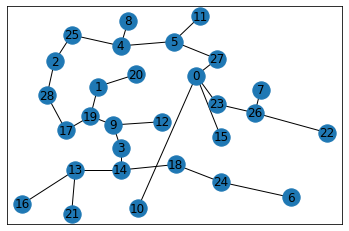

In [132]:
nx.draw_networkx(g, pos)
plt.show()

In [126]:
num_children

[111,
 70,
 0,
 27,
 36,
 -38,
 -39,
 -46,
 -58,
 27,
 -1,
 -137,
 -6,
 3,
 20,
 -2,
 -15,
 -8,
 7,
 -22,
 129,
 -45,
 -6,
 12,
 2,
 3,
 4,
 1,
 -1]

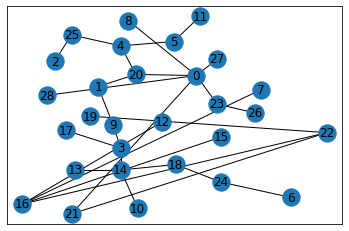

In [124]:
nx.draw_networkx(g, pos)
plt.show()

In [46]:
for idx in range(29):
    if idx == 11:
        g.nodes[idx]['num_children'] = 28
    else:
        g.nodes[idx]['num_children'] = 0

In [45]:
g.nodes[1]['num_children']

KeyError: 'num_children'

In [10]:
num_children = [0] * 29
num_children[11] = 28
num_children

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 28,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [82]:
180**2

32400

In [29]:
import random

In [101]:
oya_list=[11,11,11,11,11,11,11,11,11,11,11,-1,11,11,11,11,11,11,11,11,11,
          11,11,11,11,11,11,11,11]

In [116]:
without11 = [num for num in range(29)]
without11.remove(11)
idx = random.choice(without11)
idx = 2
# print('selected_idx = ', idx)
# print('origin_cost=', np.sum([calc_cost2parent(i)*(num_c+1) for i, num_c in enumerate(num_children)]))

table = [num for num in range(29)]
cost_min = float('inf')
idx_min = -1
for p_new in table:
    if p_new == idx:
        continue
    oya_list_ = oya_list[::]
    num_children_ = num_children[::]
    g_ = g.copy()
    p_old = oya_list[idx]
    
    g_.remove_edge(idx, oya_list[idx])
    g_.add_edge(idx, p_new)
    if not nx.is_tree(g_):
        continue
    oya_list_[idx] = p_new
    num_children_[p_old] -= num_children[idx]+1
    num_children_[p_new] += num_children[idx]+1
        
    cost = np.sum([calc_cost2parent(i)*(num_c+1) for i, num_c in enumerate(num_children_)])
    if cost < cost_min:
        cost_min = cost
        idx_min = p_new
print(idx, ':', p_old, '-->', idx_min)
p_new = idx_min
g.remove_edge(idx, oya_list[idx])
g.add_edge(idx, p_new)
oya_list[idx] = p_new
num_children[p_old] -= num_children[idx]+1
num_children[p_new] += num_children[idx]+1

2 : 11 --> 4


In [63]:
g_.remove_edge(idx, oya_list[idx])
g_.add_edge(idx, new_parent)

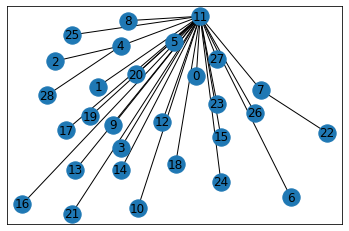

In [118]:
nx.draw_networkx(g, pos)
plt.show()

In [70]:
nx.descendants(g_, 2)

{0,
 1,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28}

In [212]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

def calc_cost2parent(node_idx, oya_list):
    if node_idx == 11:
        return 0
    return (x_list[node_idx] - x_list[oya_list[node_idx]])**2 + (y_list[node_idx] - y_list[oya_list[node_idx]])**2

def renew_num_children(idx, p_old, p_new, num_children, oya_list):
    idx_ = idx
    num_children[p_old] -= num_children[idx_]+1
#     print(num_children)
    while(True):
#         idx_ = p_old
        p_old = oya_list[p_old]
        if p_old == -1:
            break
        num_children[p_old] -= num_children[idx_]+1
#     print(num_children)
    idx_ = idx
    num_children[p_new] += num_children[idx_]+1
    while(True):
#         idx_ = p_new
        p_new = oya_list[p_new]
        if p_new == -1:
            break
        num_children[p_new] += num_children[idx_]+1
#     print(num_children)
    return

def main(K=1000, debug=False):

    #ノードのx座標リスト．例えば0番のノードのx座標はx_list[0]となる．
    x_list=[115,63,40,75,75,103,165,149,79,71,84,117,97,51,75,128,23,46,104,59,
            83,49,184,126,128,49,146,126,36]

    #ノードのy座標リスト．例えば0番のノードのy座標はy_list[0]となる．
    y_list=[176,166,189,110,203,207,65,163,226,131,55,230,134,90,90,120,59,126,
            95,139,177,50,124,150,79,213,142,191,158]

    #各ノードの送信先ノード番号のリスト．木構造で言うところの親ノードの番号．
    #初期値は全ノードは木構造のルートである11番のノードに接続されている．
    #ルートである11番の親は存在しないので-1を格納．
    oya_list=[11,11,11,11,11,11,11,11,11,11,11,-1,11,11,11,11,11,11,11,11,11,
              11,11,11,11,11,11,11,11]

    g = nx.Graph()

    #ノード番号を定義
    g.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
                      11, 12, 13, 14, 15, 16, 17, 18, 19, 
                      20, 21, 22, 23, 24, 25, 26, 27, 28])
    g.add_edges_from([
        (0, oya_list[0]),
        (1, oya_list[1]),
        (2, oya_list[2]),
        (3, oya_list[3]),
        (4, oya_list[4]),
        (5, oya_list[5]),
        (6, oya_list[6]),
        (7, oya_list[7]),
        (8, oya_list[8]),
        (9, oya_list[9]),
        (10, oya_list[10]),
    #    (11, oya_list[11]),
        (12, oya_list[12]),
        (13, oya_list[13]),
        (14, oya_list[14]),
        (15, oya_list[15]),
        (16, oya_list[16]),
        (17, oya_list[17]),
        (18, oya_list[18]),
        (19, oya_list[19]),
        (20, oya_list[20]),
        (21, oya_list[21]),
        (22, oya_list[22]),
        (23, oya_list[23]),
        (24, oya_list[24]),
        (25, oya_list[25]),
        (26, oya_list[26]),
        (27, oya_list[27]),
        (28, oya_list[28])
    ])
    num_children = [0] * 29
    num_children[11] = 28

#     K = 10000
    for k in range(K):
        without11 = [num for num in range(29)]
        without11.remove(11)
        idx = random.choice(without11)
        # idx = 2
        # print('selected_idx = ', idx)
        origin_cost = np.sum([calc_cost2parent(i, oya_list)*(num_c+1) for i, num_c in enumerate(num_children)])
        if k % 1000 == 0:
            print('k =', k, ', cost=', origin_cost)

        table = [num for num in range(29)]
        cost_min = float('inf')
        idx_min = -1
        for p_new in table:
            if p_new == idx:
                continue
            oya_list_ = oya_list[::]
            num_children_ = num_children[::]
            g_ = g.copy()
            p_old = oya_list[idx]

            g_.remove_edge(idx, oya_list[idx])
            g_.add_edge(idx, p_new)
            if not nx.is_tree(g_):
                continue
            oya_list_[idx] = p_new
            renew_num_children(idx, p_old, p_new, num_children_, oya_list)

            cost = np.sum([calc_cost2parent(i, oya_list_)*(num_c+1) for i, num_c in enumerate(num_children_)])
            if cost < cost_min:
                cost_min = cost
                idx_min = p_new
        if p_old != idx_min and debug:
            print(idx, ':', p_old, '-->', idx_min)
            print('cost: ', origin_cost, '-->', cost_min)
        p_new = idx_min
        g.remove_edge(idx, oya_list[idx])
        g.add_edge(idx, p_new)
        oya_list[idx] = p_new
        renew_num_children(idx, p_old, p_new, num_children, oya_list)
        
        if(debug):
            print(num_children)


    #エッジの描画設定．各ノードとその親ノードを結ぶ線分を描画．



    #ノードの描画設定．各ノードのx座標とy座標に基づいた点を描画．
    pos = {
        0: (x_list[0], y_list[0]),
        1: (x_list[1], y_list[1]),
        2: (x_list[2], y_list[2]),
        3: (x_list[3], y_list[3]),
        4: (x_list[4], y_list[4]),
        5: (x_list[5], y_list[5]),
        6: (x_list[6], y_list[6]),
        7: (x_list[7], y_list[7]),
        8: (x_list[8], y_list[8]),
        9: (x_list[9], y_list[9]),
        10: (x_list[10], y_list[10]),
        11: (x_list[11], y_list[11]),
        12: (x_list[12], y_list[12]),
        13: (x_list[13], y_list[13]),
        14: (x_list[14], y_list[14]),
        15: (x_list[15], y_list[15]),
        16: (x_list[16], y_list[16]),
        17: (x_list[17], y_list[17]),
        18: (x_list[18], y_list[18]),
        19: (x_list[19], y_list[19]),
        20: (x_list[20], y_list[20]),
        21: (x_list[21], y_list[21]),
        22: (x_list[22], y_list[22]),
        23: (x_list[23], y_list[23]),
        24: (x_list[24], y_list[24]),
        25: (x_list[25], y_list[25]),
        26: (x_list[26], y_list[26]),
        27: (x_list[27], y_list[27]),
        28: (x_list[28], y_list[28]),
    }

    nx.draw_networkx(g, pos)
    plt.show()

k = 0 , cost= 381149
k = 1000 , cost= 100121
k = 2000 , cost= 100121
k = 3000 , cost= 100121


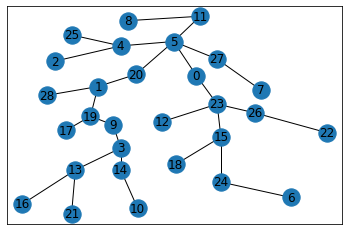

In [214]:
main(K=3001, debug=False)

In [137]:
def renew_num_children(idx, p_old, p_new, num_children, oya_list):
    idx_ = idx
    num_children[p_old] -= num_children[idx_]
    while(True):
        idx_ = p_old
        p_old = oya_list[p_old]
        num_children[p_old] -= num_children[idx_]
        if p_old == -1:
            break
    idx_ = idx
    num_children[p_new] += num_children[idx_]
    while(True):
        idx_ = p_new
        p_new = oya_list[p_new]
        num_children[p_new] += num_children[idx_]
        if p_new == -1:
            break
    return

[27,
 19,
 25,
 9,
 5,
 11,
 24,
 26,
 4,
 19,
 0,
 -1,
 9,
 14,
 3,
 0,
 13,
 28,
 14,
 17,
 1,
 13,
 26,
 0,
 18,
 4,
 23,
 5,
 2]

In [147]:
def aa(a):
    a+=1
    return a

In [148]:
a = 0
aa(a)
a

0

In [216]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

def calc_cost2parent(node_idx, oya_list):
    if node_idx == 11:
        return 0
    return (x_list[node_idx] - x_list[oya_list[node_idx]])**2 + (y_list[node_idx] - y_list[oya_list[node_idx]])**2

def renew_num_children(idx, p_old, p_new, num_children, oya_list):
    idx_ = idx
    num_children[p_old] -= num_children[idx_]+1
#     print(num_children)
    while(True):
#         idx_ = p_old
        p_old = oya_list[p_old]
        if p_old == -1:
            break
        num_children[p_old] -= num_children[idx_]+1
#     print(num_children)
    idx_ = idx
    num_children[p_new] += num_children[idx_]+1
    while(True):
#         idx_ = p_new
        p_new = oya_list[p_new]
        if p_new == -1:
            break
        num_children[p_new] += num_children[idx_]+1
#     print(num_children)
    return

def main(K=1000, debug=False):

    #ノードのx座標リスト．例えば0番のノードのx座標はx_list[0]となる．
    x_list=[115,63,40,75,75,103,165,149,79,71,84,117,97,51,75,128,23,46,104,59,
            83,49,184,126,128,49,146,126,36]

    #ノードのy座標リスト．例えば0番のノードのy座標はy_list[0]となる．
    y_list=[176,166,189,110,203,207,65,163,226,131,55,230,134,90,90,120,59,126,
            95,139,177,50,124,150,79,213,142,191,158]

    #各ノードの送信先ノード番号のリスト．木構造で言うところの親ノードの番号．
    #初期値は全ノードは木構造のルートである11番のノードに接続されている．
    #ルートである11番の親は存在しないので-1を格納．
    oya_list=[11,11,11,11,11,11,11,11,11,11,11,-1,11,11,11,11,11,11,11,11,11,
              11,11,11,11,11,11,11,11]

    g = nx.Graph()

    #ノード番号を定義
    g.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
                      11, 12, 13, 14, 15, 16, 17, 18, 19, 
                      20, 21, 22, 23, 24, 25, 26, 27, 28])
    g.add_edges_from([
        (0, oya_list[0]),
        (1, oya_list[1]),
        (2, oya_list[2]),
        (3, oya_list[3]),
        (4, oya_list[4]),
        (5, oya_list[5]),
        (6, oya_list[6]),
        (7, oya_list[7]),
        (8, oya_list[8]),
        (9, oya_list[9]),
        (10, oya_list[10]),
    #    (11, oya_list[11]),
        (12, oya_list[12]),
        (13, oya_list[13]),
        (14, oya_list[14]),
        (15, oya_list[15]),
        (16, oya_list[16]),
        (17, oya_list[17]),
        (18, oya_list[18]),
        (19, oya_list[19]),
        (20, oya_list[20]),
        (21, oya_list[21]),
        (22, oya_list[22]),
        (23, oya_list[23]),
        (24, oya_list[24]),
        (25, oya_list[25]),
        (26, oya_list[26]),
        (27, oya_list[27]),
        (28, oya_list[28])
    ])
    num_children = [0] * 29
    num_children[11] = 28

    update_cnt = 0
    for k in range(K):
        without11 = [num for num in range(29)]
        without11.remove(11)
        idx = random.choice(without11)
        # idx = 2
        # print('selected_idx = ', idx)
        origin_cost = np.sum([calc_cost2parent(i, oya_list)*(num_c+1) for i, num_c in enumerate(num_children)])
        if k % 50 == 0:
            print('k =', k, ', cost=', origin_cost)

        table = [num for num in range(29)]
        cost_min = float('inf')
        idx_min = -1
        for p_new in table:
            if p_new == idx:
                continue
            oya_list_ = oya_list[::]
            num_children_ = num_children[::]
            g_ = g.copy()
            p_old = oya_list[idx]

            g_.remove_edge(idx, oya_list[idx])
            g_.add_edge(idx, p_new)
            if not nx.is_tree(g_):
                continue
            oya_list_[idx] = p_new
            renew_num_children(idx, p_old, p_new, num_children_, oya_list)

            cost = np.sum([calc_cost2parent(i, oya_list_)*(num_c+1) for i, num_c in enumerate(num_children_)])
            if cost < cost_min:
                cost_min = cost
                idx_min = p_new
        if p_old != idx_min:
            update_cnt += 1
            if debug:
                print(idx, ':', p_old, '-->', idx_min)
                print('cost: ', origin_cost, '-->', cost_min)
        p_new = idx_min
        g.remove_edge(idx, oya_list[idx])
        g.add_edge(idx, p_new)
        oya_list[idx] = p_new
        renew_num_children(idx, p_old, p_new, num_children, oya_list)
        
        if(debug):
            print(num_children)


    #エッジの描画設定．各ノードとその親ノードを結ぶ線分を描画．



    #ノードの描画設定．各ノードのx座標とy座標に基づいた点を描画．
    pos = {
        0: (x_list[0], y_list[0]),
        1: (x_list[1], y_list[1]),
        2: (x_list[2], y_list[2]),
        3: (x_list[3], y_list[3]),
        4: (x_list[4], y_list[4]),
        5: (x_list[5], y_list[5]),
        6: (x_list[6], y_list[6]),
        7: (x_list[7], y_list[7]),
        8: (x_list[8], y_list[8]),
        9: (x_list[9], y_list[9]),
        10: (x_list[10], y_list[10]),
        11: (x_list[11], y_list[11]),
        12: (x_list[12], y_list[12]),
        13: (x_list[13], y_list[13]),
        14: (x_list[14], y_list[14]),
        15: (x_list[15], y_list[15]),
        16: (x_list[16], y_list[16]),
        17: (x_list[17], y_list[17]),
        18: (x_list[18], y_list[18]),
        19: (x_list[19], y_list[19]),
        20: (x_list[20], y_list[20]),
        21: (x_list[21], y_list[21]),
        22: (x_list[22], y_list[22]),
        23: (x_list[23], y_list[23]),
        24: (x_list[24], y_list[24]),
        25: (x_list[25], y_list[25]),
        26: (x_list[26], y_list[26]),
        27: (x_list[27], y_list[27]),
        28: (x_list[28], y_list[28]),
    }

    nx.draw_networkx(g, pos)
    plt.show()
    print('update_cnt:', update_cnt)

k = 0 , cost= 381149
k = 50 , cost= 142527
k = 100 , cost= 113781
k = 150 , cost= 100175
k = 200 , cost= 100121
k = 250 , cost= 100121
k = 300 , cost= 100121
k = 350 , cost= 100121
k = 400 , cost= 100121
k = 450 , cost= 100121
k = 500 , cost= 100121
k = 550 , cost= 100121
k = 600 , cost= 100121
k = 650 , cost= 100121
k = 700 , cost= 100121
k = 750 , cost= 100121
k = 800 , cost= 100121
k = 850 , cost= 100121
k = 900 , cost= 100121
k = 950 , cost= 100121


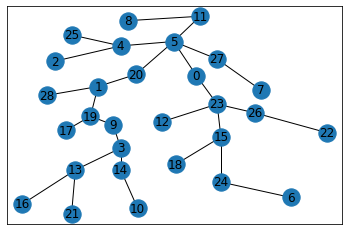

update_cnt: 45


In [218]:
main(K=1000, debug=False)

k = 0 , cost= 381149
k = 50 , cost= 152799
k = 100 , cost= 103611
k = 150 , cost= 100825
k = 200 , cost= 100121
k = 250 , cost= 100121
k = 300 , cost= 100121
k = 350 , cost= 100121
k = 400 , cost= 100121
k = 450 , cost= 100121
k = 500 , cost= 100121
k = 550 , cost= 100121
k = 600 , cost= 100121
k = 650 , cost= 100121
k = 700 , cost= 100121
k = 750 , cost= 100121
k = 800 , cost= 100121
k = 850 , cost= 100121
k = 900 , cost= 100121
k = 950 , cost= 100121


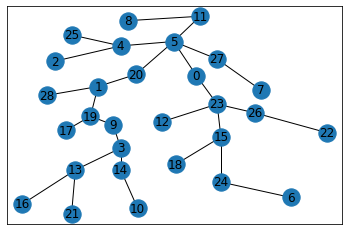

update_cnt: 42


In [219]:
main(K=1000, debug=False)